In [ ]:
!conda install -c conda-forge matplotlib
y

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
# from tensorflow.keras import Sequential, layers

# import matplotlib.pyplot as plt
import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [16]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

train_labels = keras.utils.to_categorical(train_labels, dtype = 'float32')
test_labels = keras.utils.to_categorical(test_labels, dtype = 'float32')

In [5]:
plt.imshow(test_images[0])

NameError: name 'plt' is not defined

/home/mikey/anaconda3/envs/tf/lib/python3.9/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


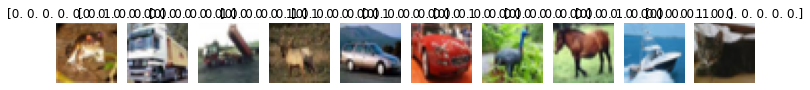

In [5]:
fig,ax = plt.subplots(nrows = 1, ncols = 10, figsize =(10,7))
for (images, labels, ax) in zip(train_images, train_labels, ax):
    ax.imshow(images)
    ax.axis('off')
    ax.set_title(labels)
    plt.tight_layout()
    
plt.show()

In [4]:
train_images[0].shape

(32, 32, 3)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D

In [6]:
# !conda update mkl

In [7]:
model = Sequential([
      Conv2D(filters = 32,kernel_size = (3,3),activation = 'relu',padding = 'same',input_shape = (32,32,3)),
      MaxPooling2D(pool_size = (2,2),strides = 2),
      Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu',padding = 'same'),
      Flatten(),
      Dense(units = 2,activation = 'relu')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 32770     
Total params: 52,162
Trainable params: 52,162
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = keras.losses.SparseCategoricalCrossentropy, metrics = ['accuracy'])

In [ ]:
model.fit(x = train_images, y = train_labels, validation_split = 0.1, epochs = 10, batch_size= 10, verbose = 2)

In [15]:
test_labels.dtype

dtype('float32')